In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

**Carga del conjunto de datos con outliers**

In [2]:
df_store_sales_outliers = pd.read_csv('../data/raw/store_sales_con_outliers.csv')
df_store_sales_outliers.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,customer_name_normalizado,city_normalizado,product_name_normalizado
0,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,claire gute,henderson,"hon deluxe fabric upholstered stacking chairs,..."
1,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,sean o'donnell,fort lauderdale,bretford cr4500 series slim rectangular table
2,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,brosina hoffman,los angeles,mitel 5320 ip phone voip phone
3,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,brosina hoffman,los angeles,chromcraft rectangular conference tables
4,12,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,brosina hoffman,los angeles,konftel 250 conference phone - charcoal black


In [3]:
# Eliminamos columnas inicesarias (repetidas) columnas=[customer_name_normalizado, city_normalizado, product_name_normalizado]
df_store_sales_outliers = df_store_sales_outliers.drop(columns=['customer_name_normalizado','city_normalizado','product_name_normalizado'])
df_store_sales_outliers

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
1,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
3,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
4,12,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,9760,CA-2017-146913,31/10/2017,05/11/2017,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,California,94109.0,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.9200
1141,9775,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.5840
1142,9782,CA-2017-153178,14/09/2017,18/09/2017,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.5680
1143,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320


---

**Carga de conjunto de datos sin outliers(Original)**

In [38]:
df_store_sales = pd.read_csv('../data/raw/train.csv')
df_store_sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


----

**Transformación de las columnas `Order Date` y `Ship Date`**

In [4]:
# Transformacioón de Order Date
df_store_sales_outliers['Order Date'] = pd.to_datetime(df_store_sales_outliers['Order Date'], format='%d/%m/%Y')
# df_store_sales_outliers['Order Date'] = df_store_sales_outliers['Order Date'].dt.date

# Tranformación de Ship Date
df_store_sales_outliers['Ship Date'] = pd.to_datetime(df_store_sales_outliers['Ship Date'], format='%d/%m/%Y')
# df_store_sales_outliers['Ship Date'] = df_store_sales_outliers['Ship Date'].dt.date

print(f'''
Tipo de datos de las columnas Order Date y Ship Date
Order Date: {df_store_sales_outliers['Order Date'].dtype}
Ship Date: {df_store_sales_outliers['Ship Date'].dtype}
''')


Tipo de datos de las columnas Order Date y Ship Date
Order Date: datetime64[ns]
Ship Date: datetime64[ns]



In [5]:
df_store_sales_outliers['Order Year'] = df_store_sales_outliers['Order Date'].dt.year
df_store_sales_outliers['Order Month'] = df_store_sales_outliers['Order Date'].dt.month

df_store_sales_outliers.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
0,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
1,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
2,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,6


---

**Transformación de las columnas `Order Date` y `Ship Date` del conjunto original**

In [40]:
# Transformacioón de Order Date conjunto original
df_store_sales['Order Date'] = pd.to_datetime(df_store_sales['Order Date'], format='%d/%m/%Y')

# Tranformación de Ship Date conjunto original
df_store_sales['Ship Date'] = pd.to_datetime(df_store_sales['Ship Date'], format='%d/%m/%Y')

df_store_sales['Order Year'] = df_store_sales['Order Date'].dt.year
df_store_sales['Order Month'] = df_store_sales['Order Date'].dt.month

df_store_sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6


----

**Obtención de 4 conjuntos (uno por cada año)**

In [6]:
df_2015 = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2015]
df_2016 = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2016]
df_2017 = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2017]
df_2018 = df_store_sales_outliers[df_store_sales_outliers['Order Year'] == 2018]

**Obtención de 4 conjuntos (uno por cada año) del original**

In [41]:
df_2015_original = df_store_sales[df_store_sales['Order Year'] == 2015]
df_2016_original = df_store_sales[df_store_sales['Order Year'] == 2016]
df_2017_original = df_store_sales[df_store_sales['Order Year'] == 2017]
df_2018_original = df_store_sales[df_store_sales['Order Year'] == 2018]

---

In [42]:
# Función para creación de gráfico del tiempo 
def graf_tiempo(data1, data2, data3, data4, con_sin):

    fig, axes = plt.subplots(2, 2, figsize=(17, 10)) # figsize para controlar el tamaño total de la imagen

    sns.lineplot(data=data1 ,x='Order Month', y='Sales', ax=axes[0, 0] ,markers='o', color='skyblue')
    axes[0, 0].set_title(f'Evolución del las ventas durante el año 2015 {con_sin}')
    axes[0, 0].set_xlabel('Meses')
    axes[0, 0].set_ylabel('Ventas')

    meses_2015 = data1['Order Month'].unique()
    axes[0, 0].set_xticks(meses_2015)
    axes[0, 0].set_xticklabels(meses_2015, rotation=45, ha='right')

    sns.lineplot(data=data2 ,x='Order Month', y='Sales', ax=axes[0, 1] ,markers='o', color='lightcoral')
    axes[0, 1].set_title(f'Evolución del las ventas durante el año 2016 {con_sin}')
    axes[0, 1].set_xlabel('Meses')
    axes[0, 1].set_ylabel('Ventas')

    meses_2016 = data2['Order Month'].unique()
    axes[0, 1].set_xticks(meses_2016)
    axes[0, 1].set_xticklabels(meses_2016, rotation=45, ha='right')

    sns.lineplot(data=data3 ,x='Order Month', y='Sales', ax=axes[1, 0] ,markers='o', color='lightgreen')
    axes[1, 0].set_title(f'Evolución del las ventas durante el año 2017 {con_sin}')
    axes[1, 0].set_xlabel('Meses')
    axes[1, 0].set_ylabel('Ventas')

    meses_2017 = data3['Order Month'].unique()
    axes[1, 0].set_xticks(meses_2017)
    axes[1, 0].set_xticklabels(meses_2017, rotation=45, ha='right')

    sns.lineplot(data=data4 ,x='Order Month', y='Sales', ax=axes[1, 1] ,markers='o', color='mediumpurple')
    axes[1, 1].set_title(f'Evolución del las ventas durante el año 2018 {con_sin}')
    axes[1, 1].set_xlabel('Meses')
    axes[1, 1].set_ylabel('Ventas')
    
    meses_2018 = data4['Order Month'].unique()
    axes[1, 1].set_xticks(meses_2018)
    axes[1, 1].set_xticklabels(meses_2018, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

---

**Análisis de conjunto 2015, 2016, 2017 y 2018 (Gráfico de tiempo)**

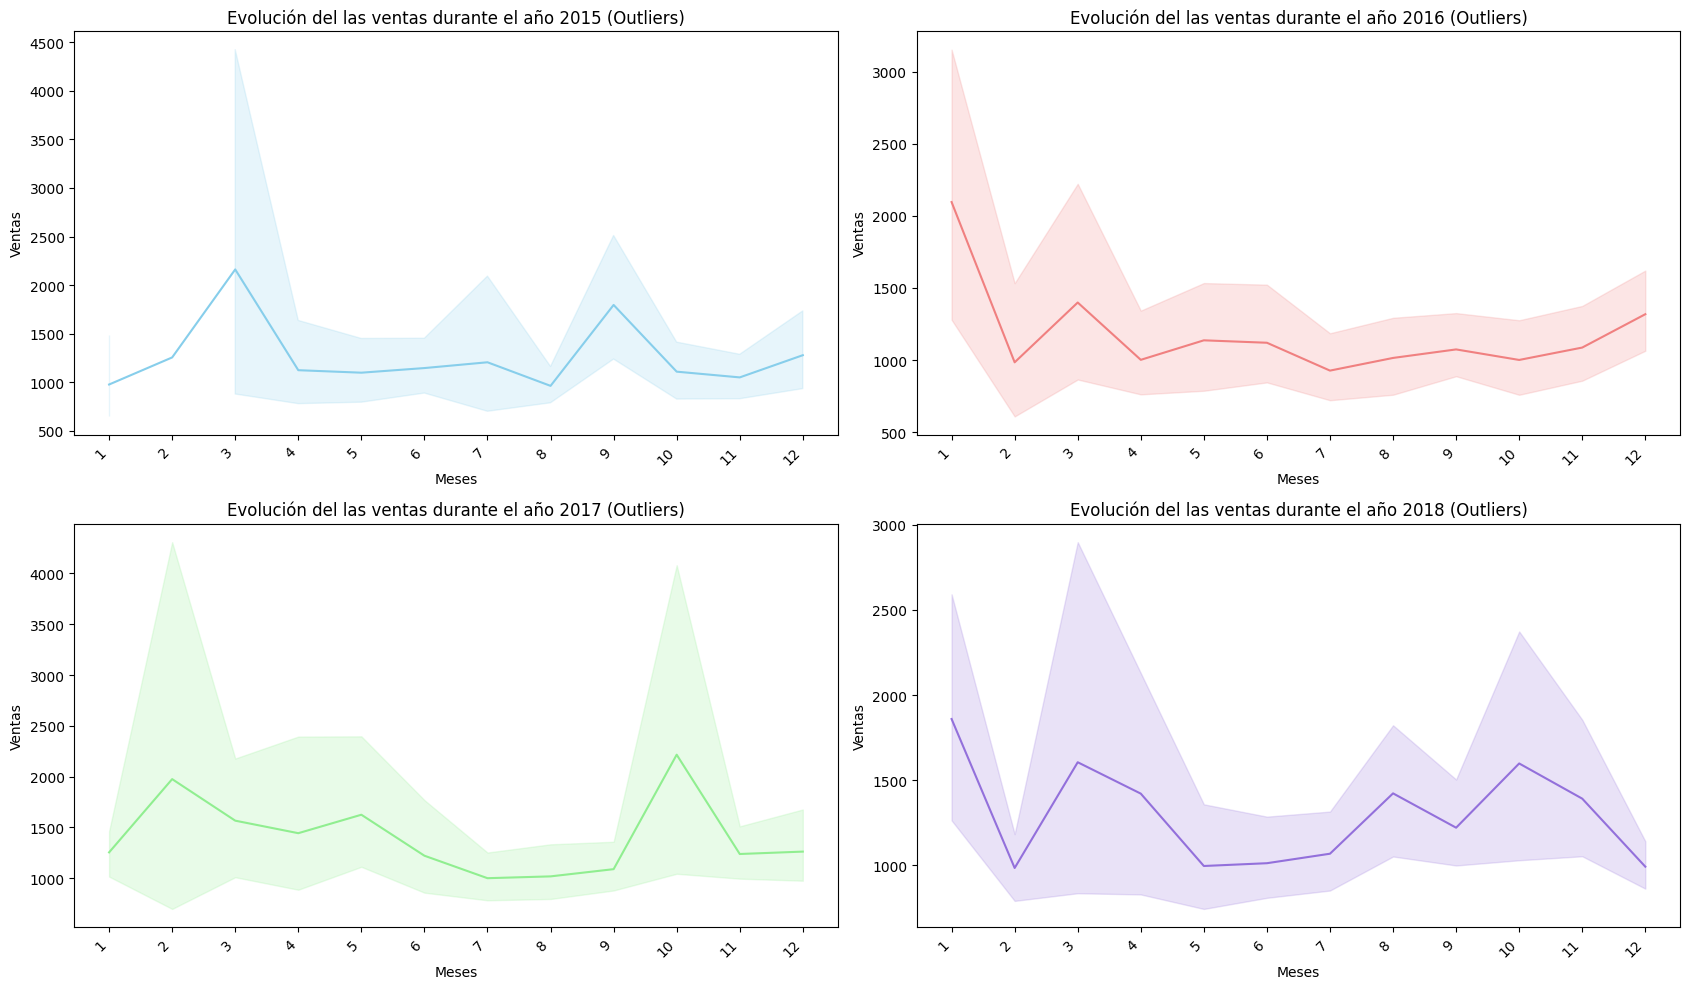

In [43]:
graf_tiempo(
    data1=df_2015,
    data2=df_2016,
    data3=df_2017,
    data4=df_2018,
    con_sin='(Outliers)'
)